In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.image as mpimg

In [3]:
train_csv = pd.read_csv('D:/ML/Jupyter/Data/Bricks/question_1_dataset/Train.csv');
test_csv = pd.read_csv('D:/ML/Jupyter/Data/Bricks/question_1_dataset/Test.csv');

In [4]:
train_filenames = ['D:\ML\Jupyter\Data\Bricks\question_1_dataset/train/train/' + fname for fname in train_csv['name'].tolist()]
test_filenames = ['D:\ML\Jupyter\Data\Bricks\question_1_dataset/test/test/' + fname for fname in test_csv['name'].tolist()]

In [5]:
x_train = [mpimg.imread(i) for i in train_filenames];
y_train = train_csv['category'].tolist()
x_test = [mpimg.imread(i) for i in test_filenames];

In [6]:
x_train=np.asarray(x_train);
y_train=np.asarray(y_train);
x_test =np.asarray(x_test);

In [7]:
model = keras.models.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',input_shape=(200,200,4),activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(16, kernel_size=(3,3), padding='same',activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'),  
  keras.layers.Dense(16, activation='softmax',kernel_initializer='glorot_uniform',bias_initializer='zeros')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               20480512  
_________________________________________________________________
dense_1 (Dense)              (None, 16)                8

In [9]:
optimizer=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.9, epsilon=1e-07)

In [10]:
loss=keras.losses.SparseCategoricalCrossentropy()

In [11]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

In [12]:
history=model.fit(x_train, y_train-1, validation_split=0.1, epochs=5,batch_size=32)

Train on 4018 samples, validate on 447 samples
Epoch 1/5
4018/4018 [==============================] - 192s 48ms/sample - loss: 1.2111 - accuracy: 0.6394 - val_loss: 0.5521 - val_accuracy: 0.7964
Epoch 2/5
4018/4018 [==============================] - 169s 42ms/sample - loss: 0.4178 - accuracy: 0.8579 - val_loss: 0.6458 - val_accuracy: 0.7718
Epoch 3/5
4018/4018 [==============================] - 163s 41ms/sample - loss: 0.2374 - accuracy: 0.9082 - val_loss: 0.5595 - val_accuracy: 0.8054
Epoch 4/5
4018/4018 [==============================] - 159s 39ms/sample - loss: 0.1596 - accuracy: 0.9405 - val_loss: 0.8952 - val_accuracy: 0.8345
Epoch 5/5
4018/4018 [==============================] - 158s 39ms/sample - loss: 0.1231 - accuracy: 0.9535 - val_loss: 0.7263 - val_accuracy: 0.8166


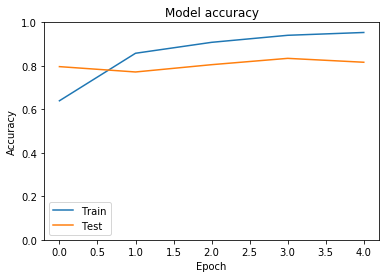

In [25]:
# Plot training & validation accuracy values
fi=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.ylim((0,1))
plt.show()
fi.savefig('Accuracy.jpeg')

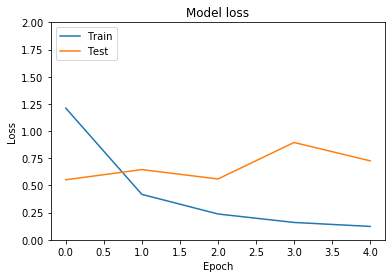

In [23]:
# Plot training & validation loss values
fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,2))
plt.show()
fig.savefig('Loss.jpeg')

In [17]:
Result=np.argmax(model.predict(x_test),axis=1)

test_csv['predictions']=Result+1

test_csv.to_csv(r'D:\ML\Jupyter\Data\Bricks\question_1_dataset\Result.csv')